In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
df = pd.read_csv('~/Desktop/masterThesis/investmentfound/dataWithCycle.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()

,SP500Returns,SP500,HousePriceIndex,RetailTrade,IRSpread,BuildingPermits,ConsumerSentiment,AvgWeeklyHoursProd,FutureNewOrders,DollarIndex,...,ManTradeSales_pct_change,InvToSales_pct_change,AvgDurUnem_pct_change,PrimeLendRate_pct_change,CommNndLoansAllBanks_pct_change,OutstandingLoans_pct_change,RealGDP_pct_change,PeriodS,PeriodNum,Period
Date,,,,,,,,,,,,,,,,,,,,,
1978-02-01,-0.024762,87.040001,80.583382,55.708089,1.83,1736,84.3,39.9,31.0,-0.021109,...,0.022934,-0.018169,-0.031008,0.000000,0.011838,0.007123,0.011782,Expansion,1,e
1978-03-01,0.024931,89.209999,81.679709,56.606325,1.86,1799,78.8,40.5,31.8,-0.008034,...,0.010041,-0.001423,-0.008000,0.000000,0.019362,0.021470,0.014430,Expansion,1,e
1978-04-01,0.085416,96.830002,82.740000,57.636083,2.04,1948,81.6,40.4,35.1,0.018969,...,0.030296,-0.020670,-0.008065,0.000000,0.014816,0.011719,0.011946,Expansion,1,e
1978-05-01,0.004234,97.239998,83.662872,57.620072,1.85,1766,82.9,40.4,22.6,-0.001673,...,-0.000951,0.005095,-0.016260,0.062500,0.024245,0.021821,0.005989,Expansion,1,e
1978-06-01,-0.017585,95.529999,84.457336,57.896853,1.61,1983,80.0,40.6,20.1,-0.020218,...,0.005543,-0.002172,0.000000,0.058824,0.005730,0.014484,0.002194,Expansion,1,e


In [32]:
df.describe()

,SP500Returns,SP500,HousePriceIndex,RetailTrade,IRSpread,BuildingPermits,ConsumerSentiment,AvgWeeklyHoursProd,FutureNewOrders,DollarIndex,...,IndProdInd_pct_change,DispPersIncome_pct_change,ManTradeSales_pct_change,InvToSales_pct_change,AvgDurUnem_pct_change,PrimeLendRate_pct_change,CommNndLoansAllBanks_pct_change,OutstandingLoans_pct_change,RealGDP_pct_change,PeriodNum
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,...,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.007885,1139.516063,259.154553,81.244514,2.070578,1377.908582,85.556716,40.953918,34.153545,0.000589,...,0.001511,0.002310,0.002034,0.000109,0.002355,0.000557,0.004909,0.005431,0.002184,0.899254
std,0.043796,1018.577824,122.509882,18.775493,1.446187,387.532111,12.957107,0.736564,18.989287,0.025033,...,0.009613,0.016519,0.011773,0.012515,0.052175,0.044291,0.012603,0.006908,0.004044,0.301274
min,-0.217630,87.040001,80.583382,50.352795,-2.320000,513.000000,50.000000,37.300000,-21.100000,-0.070008,...,-0.131961,-0.153493,-0.120930,-0.089736,-0.582353,-0.315789,-0.038767,-0.015252,-0.036027,0.000000
25%,-0.017368,315.895012,159.328988,64.208188,1.057500,1111.000000,75.575000,40.500000,23.200000,-0.015230,...,-0.002088,0.000041,-0.003273,-0.004955,-0.019011,0.000000,-0.000770,0.002264,0.001146,1.000000
50%,0.011426,1018.815002,236.097844,84.951567,2.095000,1402.000000,89.200000,41.100000,35.100000,0.000166,...,0.002212,0.002365,0.001929,0.000684,0.000000,0.000000,0.004901,0.005237,0.002350,1.000000
75%,0.035778,1432.249970,349.289603,96.166997,3.165000,1669.000000,94.725000,41.500000,46.425000,0.016420,...,0.005757,0.004658,0.007619,0.005717,0.023651,0.000000,0.010600,0.008588,0.003453,1.000000
max,0.131767,4766.180176,632.005561,126.617970,4.690000,2263.000000,112.000000,42.300000,84.600000,0.094434,...,0.062754,0.226730,0.080390,0.130628,0.492958,0.224138,0.149075,0.065934,0.032793,1.000000


In [33]:
def add_lags(df):

    df['YOYCoreCPI_lag3'] = df['YOYCoreCPI'].shift(-3)
    df['YOYCoreCPI_lag4'] = df['YOYCoreCPI'].shift(-4)
    df['YOYCoreCPI_lag5'] = df['YOYCoreCPI'].shift(-5)
    df['YOYCoreCPI_lag6'] = df['YOYCoreCPI'].shift(-6)

    df['RealGDP_lag3'] = df['RealGDP'].shift(-3)
    df['RealGDP_lag4'] = df['RealGDP'].shift(-4)
    df['RealGDP_lag5'] = df['RealGDP'].shift(-5)
    df['RealGDP_lag6'] = df['RealGDP'].shift(-6)

    
    return df

df = add_lags(df)

df=df.dropna()
df

,SP500Returns,SP500,HousePriceIndex,RetailTrade,IRSpread,BuildingPermits,ConsumerSentiment,AvgWeeklyHoursProd,FutureNewOrders,DollarIndex,...,PeriodNum,Period,YOYCoreCPI_lag3,YOYCoreCPI_lag4,YOYCoreCPI_lag5,YOYCoreCPI_lag6,RealGDP_lag3,RealGDP_lag4,RealGDP_lag5,RealGDP_lag6
Date,,,,,,,,,,,,,,,,,,,,,
1978-02-01,-0.024762,87.040001,80.583382,55.708089,1.83,1736,84.3,39.9,31.0,-0.021109,...,1,e,0.067657,0.068852,0.071895,0.074797,6618.005226,6632.525040,6644.754000,6671.373432
1978-03-01,0.024931,89.209999,81.679709,56.606325,1.86,1799,78.8,40.5,31.8,-0.008034,...,1,e,0.068852,0.071895,0.074797,0.079288,6632.525040,6644.754000,6671.373432,6705.431716
1978-04-01,0.085416,96.830002,82.740000,57.636083,2.04,1948,81.6,40.4,35.1,0.018969,...,1,e,0.071895,0.074797,0.079288,0.083871,6644.754000,6671.373432,6705.431716,6734.069000
1978-05-01,0.004234,97.239998,83.662872,57.620072,1.85,1766,82.9,40.4,22.6,-0.001673,...,1,e,0.074797,0.079288,0.083871,0.085072,6671.373432,6705.431716,6734.069000,6747.659492
1978-06-01,-0.017585,95.529999,84.457336,57.896853,1.61,1983,80.0,40.6,20.1,-0.020218,...,1,e,0.079288,0.083871,0.085072,0.084530,6705.431716,6734.069000,6747.659492,6749.513651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,-0.008334,4567.000000,563.301524,122.062338,1.73,1729,67.4,41.4,28.0,0.019868,...,1,e,0.064157,0.064360,0.061337,0.060113,19891.506453,19883.204366,19895.271000,19925.280326
2021-12-01,0.043613,4766.180176,569.664103,119.459148,1.84,1896,70.6,41.4,24.2,-0.003334,...,1,e,0.064360,0.061337,0.060113,0.059125,19883.204366,19895.271000,19925.280326,19976.745153
2022-01-01,-0.052585,4515.549805,578.700000,122.784170,1.87,1841,67.2,41.2,29.4,0.009094,...,1,e,0.061337,0.060113,0.059125,0.059115,19895.271000,19925.280326,19976.745153,20054.663000


In [34]:
# Extract the features and labels
X = df[
    ['SP500', 
    'HousePriceIndex', 
    'RetailTrade', 
    #'IRSpread', 
    'BuildingPermits', 
    'ConsumerSentiment', 
    'AvgWeeklyHoursProd',
    #'FutureNewOrders',
    #'DollarIndex',
    'ThreemonthsIR',
    #'FiveyearsIR',
    #'TenyearsIR',
    'ThirtyyearsIR',
    'IndProdInd',
    'DispPersIncome',
    'RealGDP',
    'ManTradeSales',
    'InvToSales',
    'AvgDurUnem',
    'YOYCoreCPI_lag3',
    'PrimeLendRate',
    'ConsumerDebtToIncome',
    'CommNndLoansAllBanks',
    'OutstandingLoans'
    ]
    ] # features
y = df['Period'] == "r" # labels

Text(0.5, 1.0, 'Correlation between different fearures')

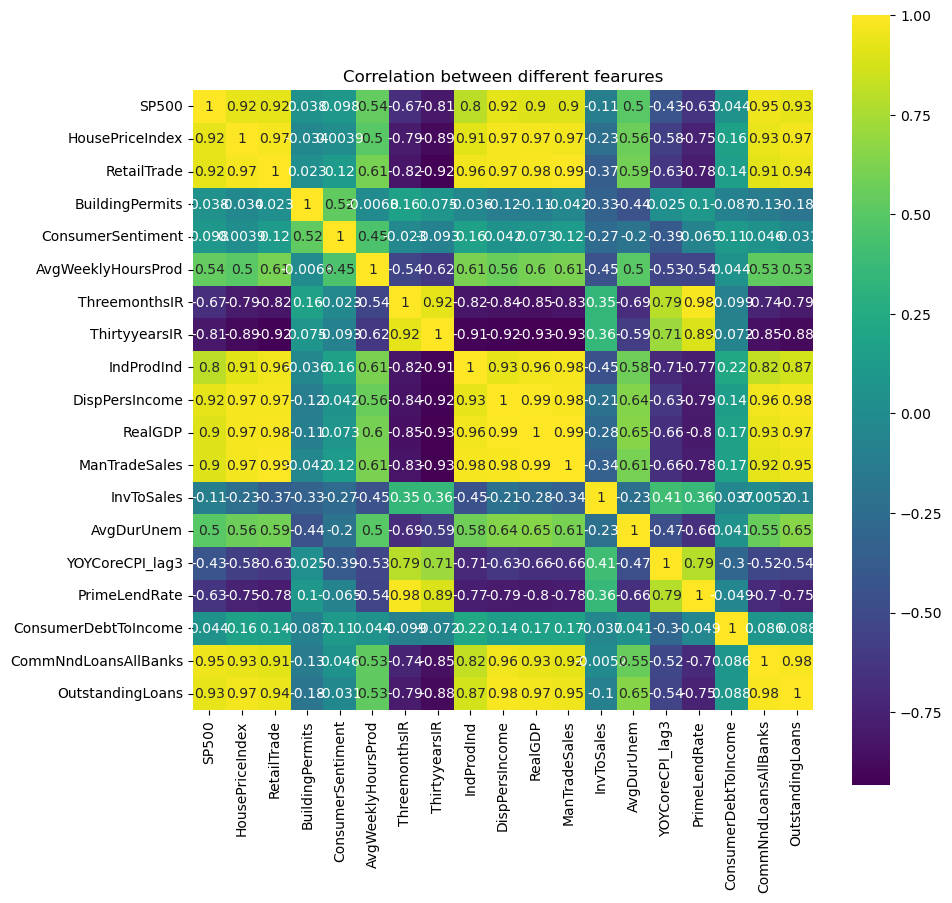

In [35]:
correlation = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [36]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ -1.04376235,  -1.49291008,  -1.36598761, ..., -10.52682282,
         -1.31557774,  -1.22789621],
       [ -1.04154315,  -1.48353009,  -1.31706043, ...,  -9.41267328,
         -1.30928655,  -1.22321034],
       [ -1.03375037,  -1.47445842,  -1.26096916, ...,  -8.37847207,
         -1.30437904,  -1.22059764],
       ...,
       [  3.48515933,   2.76888968,   2.28766653, ...,  -0.21995996,
          2.18923769,   2.1534806 ],
       [  3.34033861,   2.8760624 ,   2.30118113, ...,  -0.20849139,
          2.20567571,   2.17657145],
       [  3.50035662,   2.99663939,   2.28506606, ...,  -0.20211379,
          2.26156983,   2.22104942]])

In [37]:
pca = PCA()
pca.fit_transform(X)

array([[ 4.97850745e+00,  1.20392222e-01,  1.79481961e+00, ...,
         4.22721143e-02, -5.05351051e-02,  1.33777882e-03],
       [ 4.77078409e+00,  7.61681217e-03,  1.51928879e+00, ...,
         2.49663805e-02, -1.72056971e-02, -1.52030955e-02],
       [ 4.67475361e+00, -5.37194066e-01,  1.42859046e+00, ...,
         1.26571839e-02, -1.29308212e-02, -1.10374787e-02],
       ...,
       [-6.10425120e+00,  1.24219879e+00,  2.97009187e+00, ...,
        -2.36416352e-03, -1.29287902e-02, -1.30658426e-03],
       [-6.20041820e+00,  1.47554307e+00,  2.86572802e+00, ...,
         8.57888188e-02,  1.66900839e-03, -2.37276895e-02],
       [-6.09577950e+00,  1.84922376e+00,  3.27593517e+00, ...,
         1.17066825e-01,  5.33289560e-02, -5.95574398e-02]])

In [38]:
pca.get_covariance()

array([[ 1.00189036,  0.92640521,  0.92039971,  0.03817144,  0.09824022,
         0.53795274, -0.67495654, -0.80710261,  0.80288415,  0.92075272,
         0.90072558,  0.89780399, -0.10896641,  0.49657186, -0.42805445,
        -0.63441444,  0.04382831,  0.9520363 ,  0.92925276],
       [ 0.92640521,  1.00189036,  0.97314986, -0.03412866,  0.00392126,
         0.50044565, -0.79451352, -0.88889296,  0.91200519,  0.9765947 ,
         0.97514575,  0.96843088, -0.23444899,  0.56566195, -0.57924807,
        -0.74886703,  0.16484111,  0.9366573 ,  0.96812945],
       [ 0.92039971,  0.97314986,  1.00189036,  0.02350069,  0.12181442,
         0.60795886, -0.82284862, -0.92642048,  0.96159624,  0.97555483,
         0.98564435,  0.99370582, -0.36608435,  0.5863878 , -0.62957209,
        -0.77892579,  0.14256788,  0.91513909,  0.94200483],
       [ 0.03817144, -0.03412866,  0.02350069,  1.00189036,  0.52564343,
        -0.00680399,  0.1630616 ,  0.0753744 , -0.03569372, -0.12119048,
        -0.110

In [39]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([6.44266254e-01, 1.11597545e-01, 7.01338012e-02, 5.73294716e-02,
       4.08369519e-02, 3.38242208e-02, 1.57017897e-02, 1.17078284e-02,
       4.97958558e-03, 3.83306960e-03, 1.94471658e-03, 1.75433728e-03,
       9.77677393e-04, 4.23909727e-04, 3.03569230e-04, 2.13787205e-04,
       9.78685915e-05, 4.30909851e-05, 3.05247476e-05])

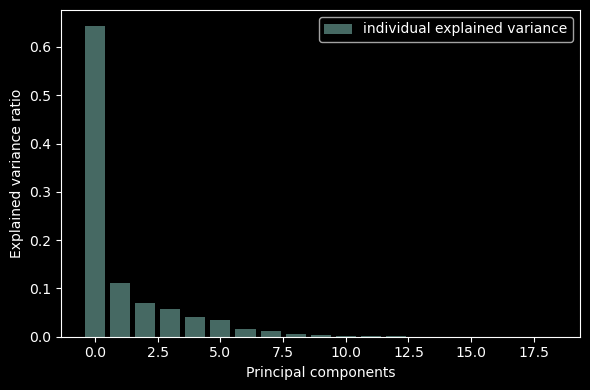

In [40]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(19), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [51]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new = -1*X_new
X_new

array([[-4.97850745e+00, -1.20392222e-01, -1.79481961e+00,
        -9.63505551e+00,  9.85331583e-01],
       [-4.77078409e+00, -7.61681217e-03, -1.51928879e+00,
        -8.84463439e+00,  9.00976580e-01],
       [-4.67475361e+00,  5.37194066e-01, -1.42859046e+00,
        -8.06931707e+00,  3.72498534e-01],
       ...,
       [ 6.10425120e+00, -1.24219879e+00, -2.97009187e+00,
        -8.57914609e-01, -1.76374895e+00],
       [ 6.20041820e+00, -1.47554307e+00, -2.86572802e+00,
        -8.92544420e-01, -1.49529423e+00],
       [ 6.09577950e+00, -1.84922376e+00, -3.27593517e+00,
        -6.77277300e-01, -1.46973998e+00]])

In [52]:
pca.get_covariance()

array([[ 1.03511873,  0.91305089,  0.90402736,  0.02504563,  0.10340014,
         0.50873216, -0.68707358, -0.82134203,  0.81763947,  0.91535014,
         0.89899749,  0.89678007, -0.09242694,  0.46580942, -0.46572358,
        -0.64895865,  0.02535163,  0.93372752,  0.921064  ],
       [ 0.91305089,  1.07145948,  0.9605696 , -0.03670148,  0.01633567,
         0.49564484, -0.80503284, -0.89689081,  0.90659424,  0.9659329 ,
         0.96244197,  0.95797203, -0.22146362,  0.56358454, -0.58103903,
        -0.75917701,  0.15822171,  0.92991192,  0.95056091],
       [ 0.90402736,  0.9605696 ,  1.08160837,  0.03067573,  0.1264367 ,
         0.58746474, -0.84105138, -0.92802572,  0.93741083,  0.96520862,
         0.97124864,  0.97460041, -0.33297265,  0.57543474, -0.65480241,
        -0.80520546,  0.1326892 ,  0.91132217,  0.93452874],
       [ 0.02504563, -0.03670148,  0.03067573,  0.94388952,  0.51725885,
         0.02295402,  0.19652561,  0.06602663,  0.00829089, -0.11716626,
        -0.095

In [53]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.64426625, 0.11159755, 0.0701338 , 0.05732947, 0.04083695])

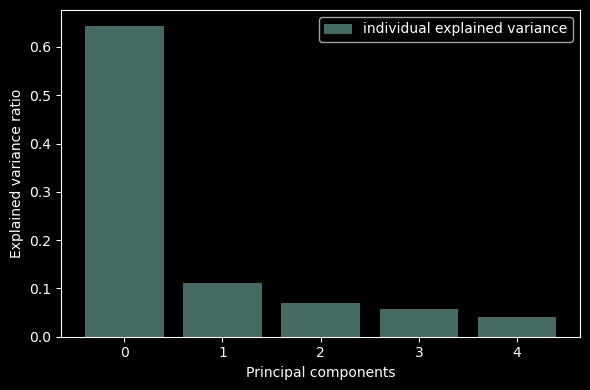

In [54]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

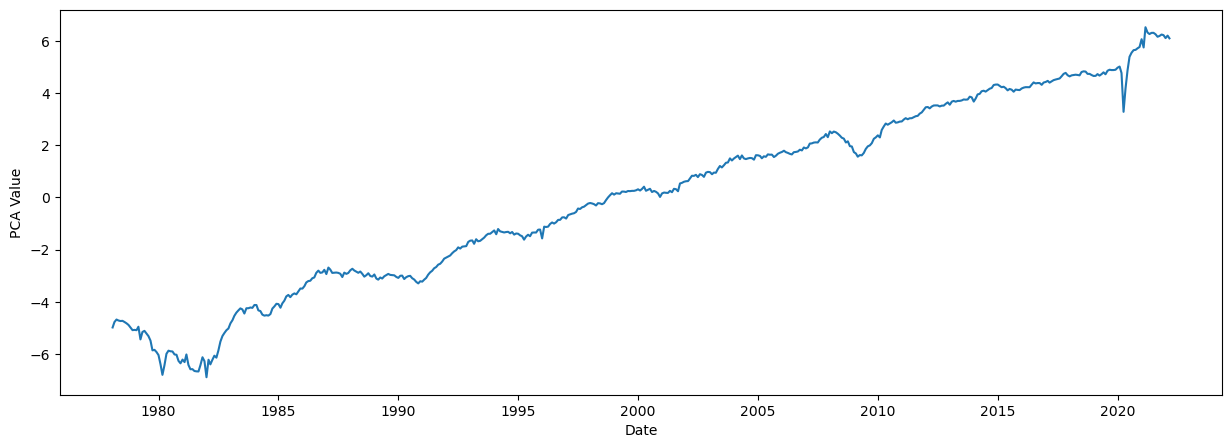

In [55]:
# Plot the data
plt.figure(figsize=(15,5))
plt.plot(df.index, X_new[:, 0])
plt.xlabel('Date')
plt.ylabel('PCA Value')
plt.show()